In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

veri=pd.read_csv("/content/Advertising.csv")

y=veri["Sales"]
x=veri.drop(columns="Sales")

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=0)
x_train, x_validation, y_train, y_validation=train_test_split(x_train,y_train,test_size=0.1, random_state=0)

model=Sequential()

model.add(Dense(64, input_dim=x_train.shape[1], activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="relu"))

model.compile(optimizer="adam", loss="mse", metrics=["mean_absolute_error"])
output=model.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=50, verbose=0)

print(output.history.keys())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


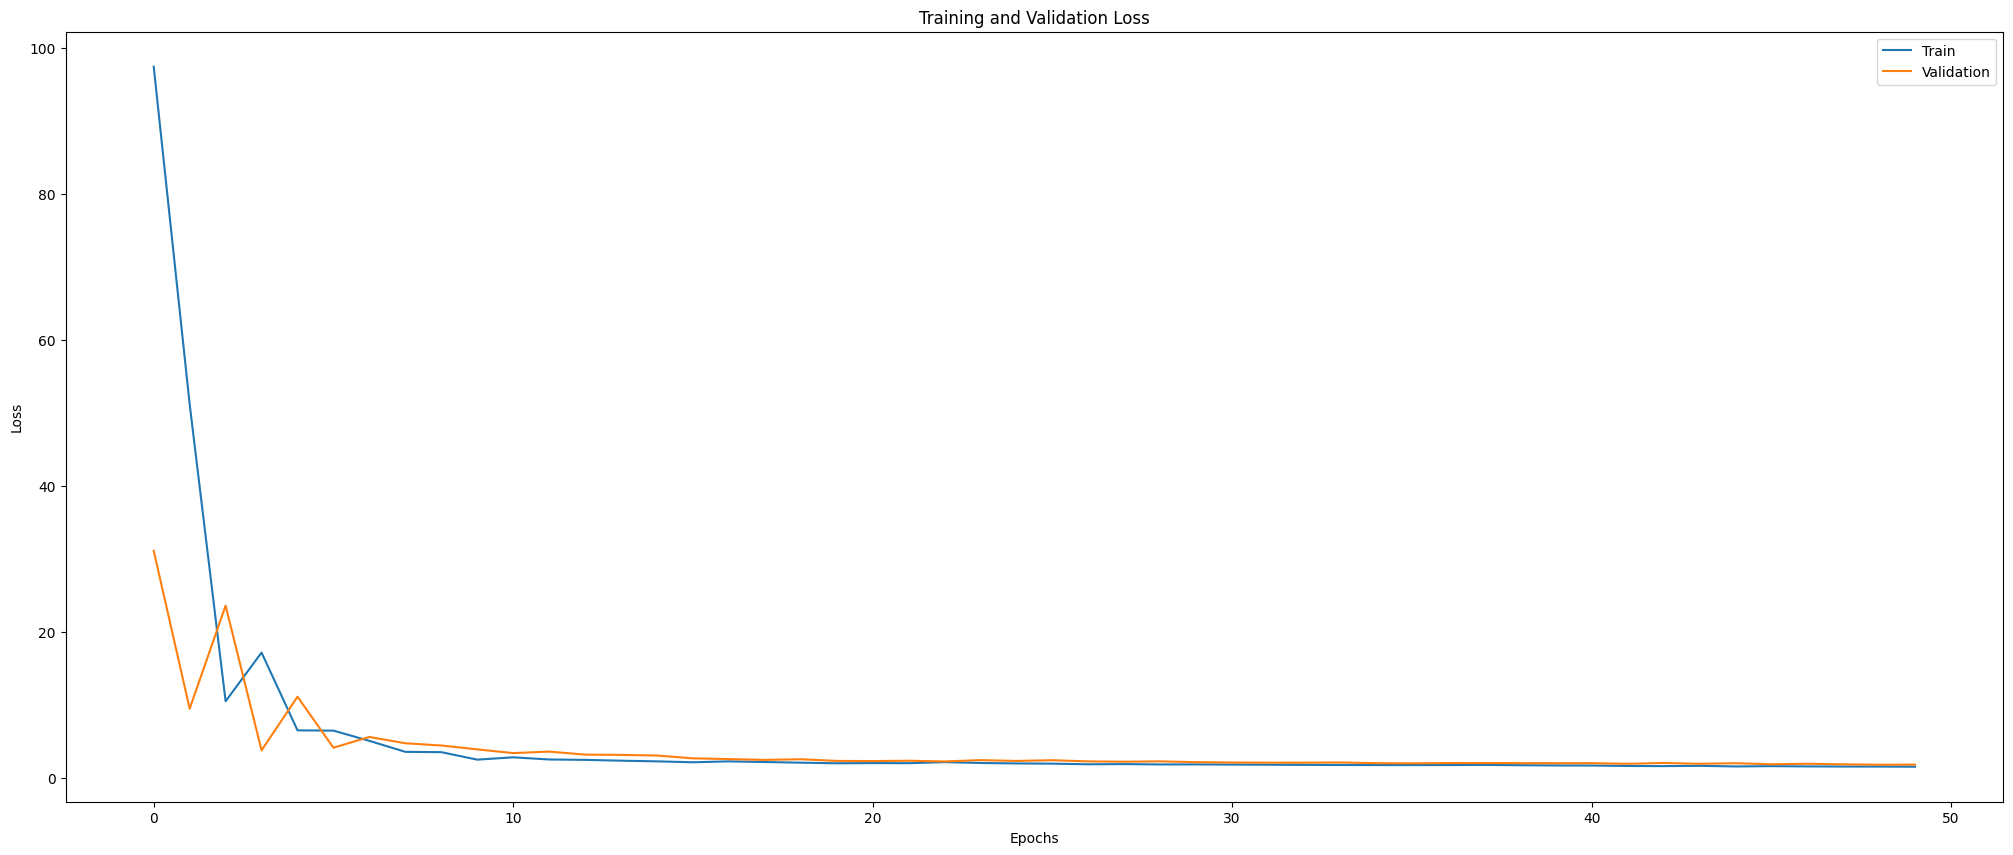

In [12]:
loss=output.history["loss"]
validation_loss=output.history["val_loss"]
metric=output.history["mean_absolute_error"]
validation_metric=output.history["val_mean_absolute_error"]

plt.figure(figsize=(25,10))
plt.plot(loss)
plt.plot(validation_loss)
plt.title("Training and Validation Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["Train", "Validation"], loc="upper right")
plt.show()


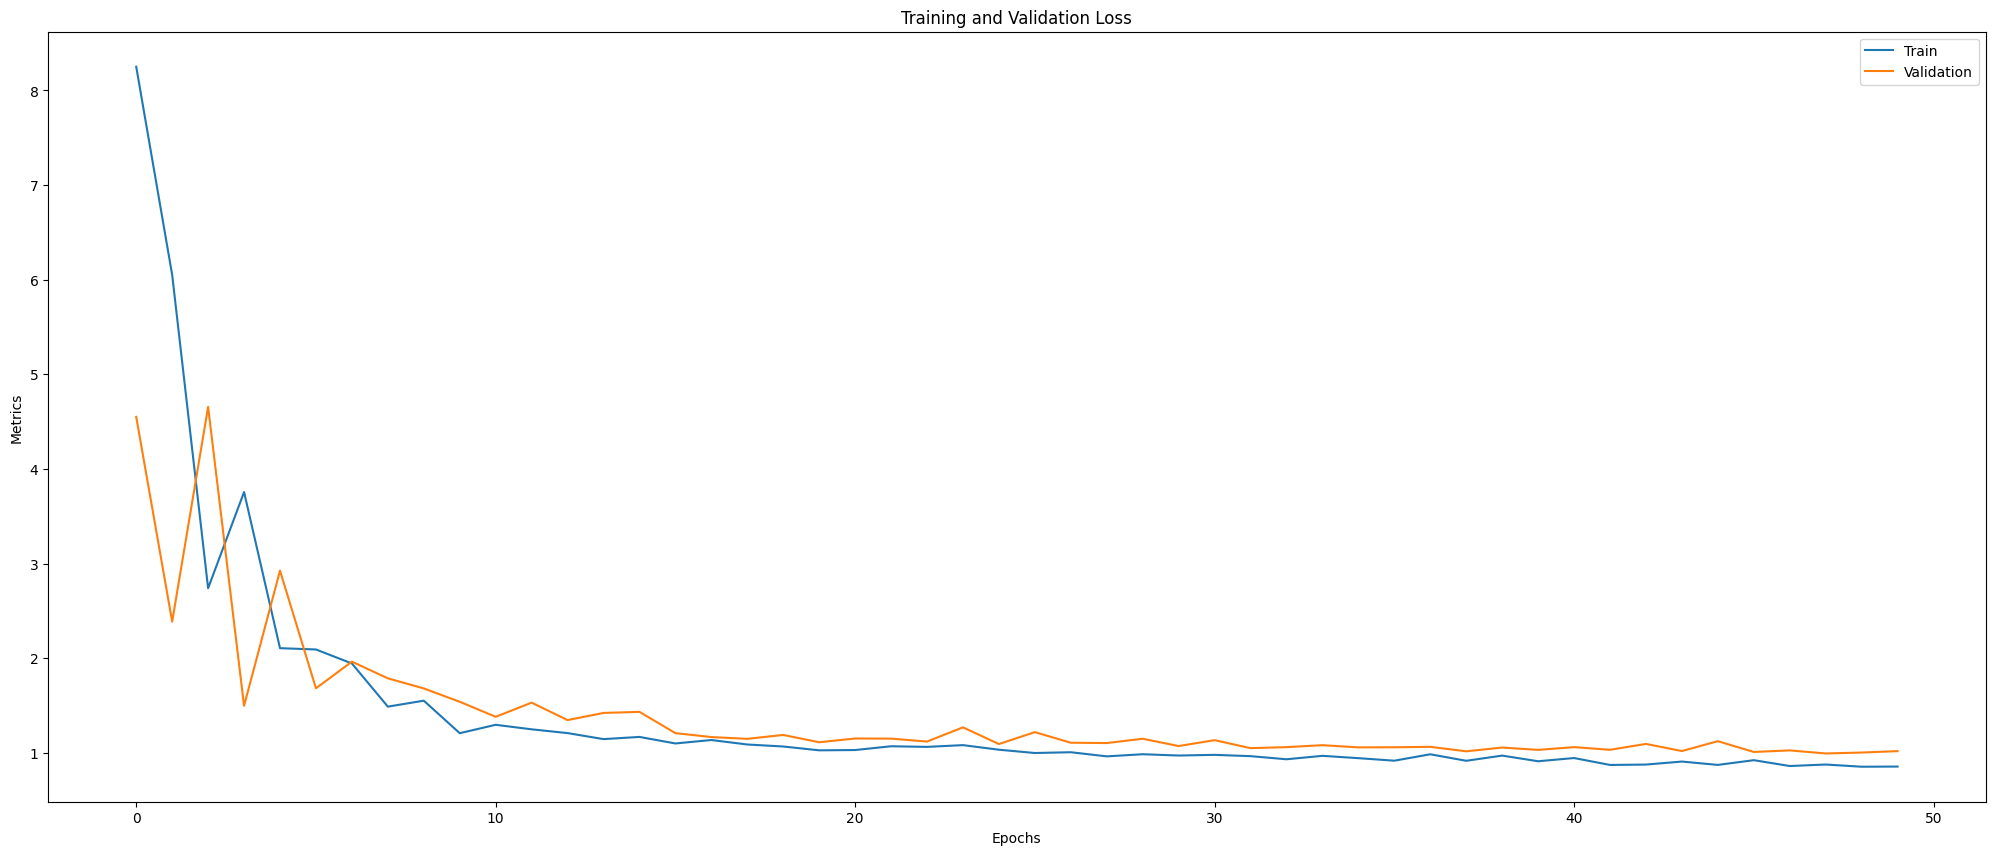

In [14]:
plt.figure(figsize=(25,10))
plt.plot(metric)
plt.plot(validation_metric)
plt.title("Training and Validation Loss")
plt.ylabel("Metrics")
plt.xlabel("Epochs")
plt.legend(["Train", "Validation"], loc="upper right")
plt.show()
